# Data Preprocessing & EDA on Insurance Dataset
### Preparing Data for Machine Learning

In this notebook, we will:
1. Load and inspect the raw `insurance.csv` file  
2. Clean missing or inconsistent values  
3. Explore and visualize data (EDA)  
4. Detect and treat outliers  
5. Encode categorical variables & scale numerical features  
6. Prepare a final dataset ready for ML algorithms
    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/AFFAN/OneDrive/Desktop/MACHINE LEARNING/insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.shape

(1338, 7)

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='age', ylabel='Count'>

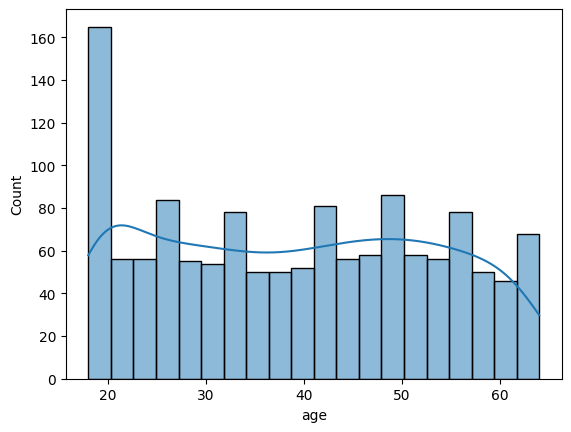

In [12]:
sns.histplot(df['age'],bins=20,kde=True)

<Axes: xlabel='age', ylabel='Density'>

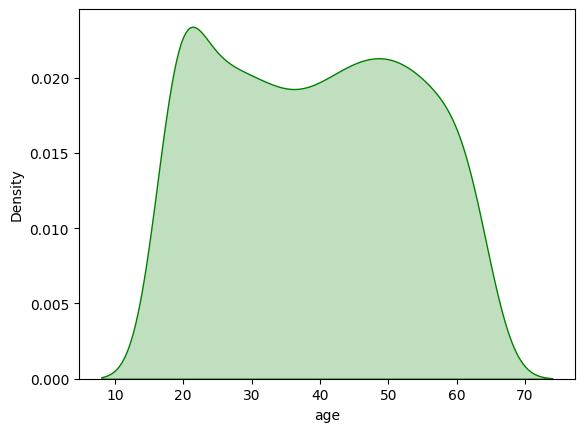

In [13]:
sns.kdeplot(df['age'],fill=True,color="green")

<Axes: xlabel='bmi', ylabel='Count'>

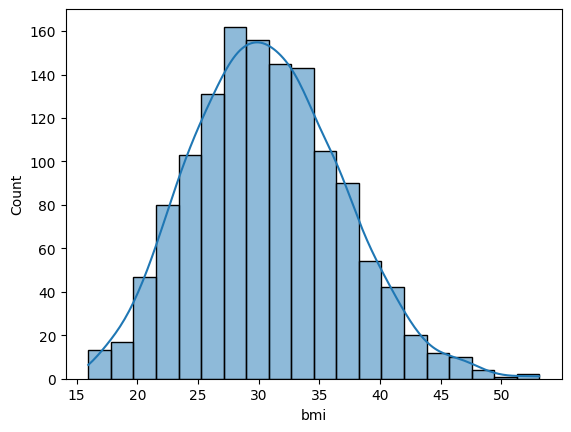

In [14]:
sns.histplot(df['bmi'],bins=20,kde=True)

<Axes: xlabel='charges', ylabel='Count'>

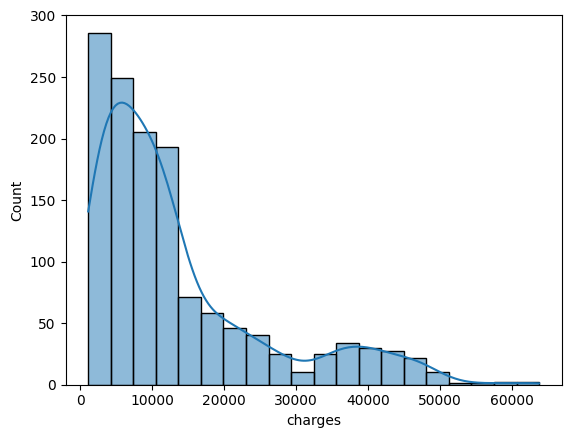

In [15]:
sns.histplot(df['charges'],bins=20,kde=True)

In [16]:
cat_cols=['sex','smoker','region']
for col in cat_cols:
    print(df[col].value_counts())


sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


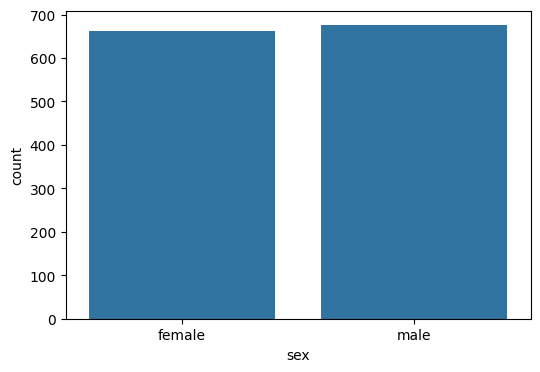

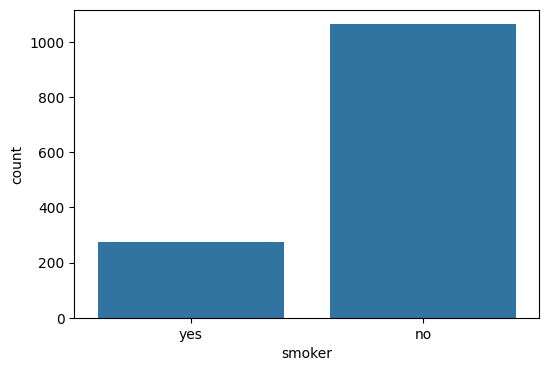

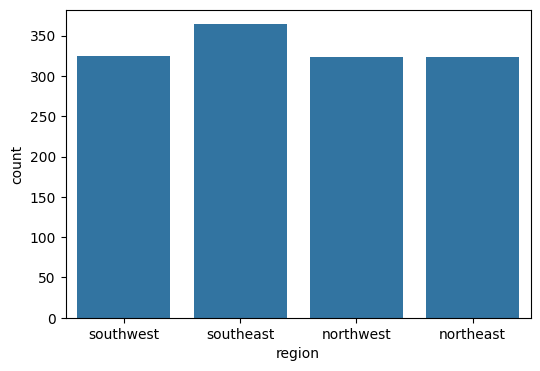

In [17]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col,data=df)
    plt.show()


<Axes: xlabel='smoker', ylabel='count'>

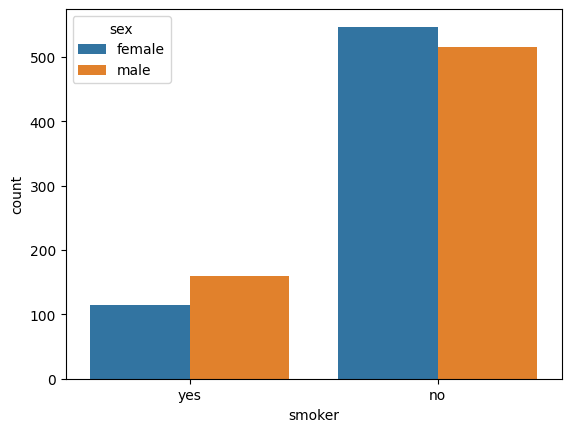

In [18]:
sns.countplot(x="smoker",hue="sex",data=df)

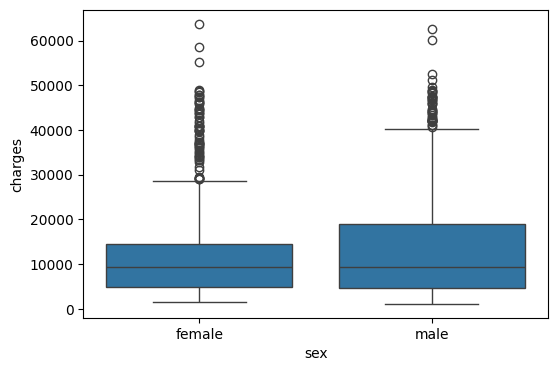

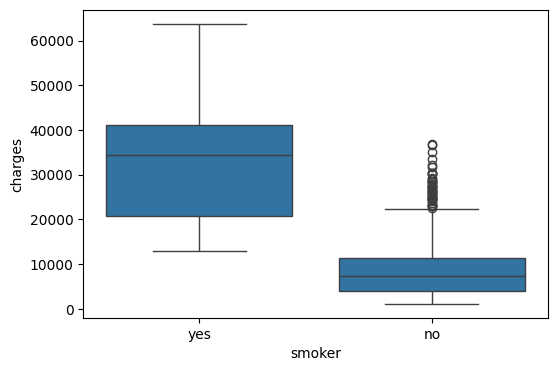

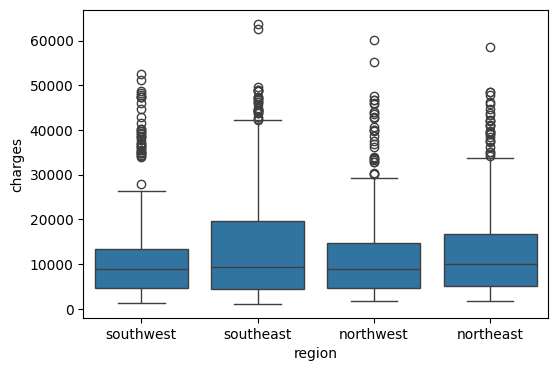

In [19]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col,y="charges",data=df)
    plt.show()
    

In [20]:
df_encoded=pd.get_dummies(df,columns=["sex","smoker","region"],drop_first=True)

In [21]:
df_encoded=df_encoded.astype(int)

In [22]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [23]:
!pip install scikit-learn


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler =StandardScaler()
cols_to_scale=["age","bmi","children"]
df_encoded[cols_to_scale]=scaler.fit_transform(df_encoded[cols_to_scale])
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.517949,-0.909234,16884,0,1,0,0,1
1,-1.511647,0.462463,-0.079442,1725,1,0,0,1,0
2,-0.799350,0.462463,1.580143,4449,1,0,0,1,0
3,-0.443201,-1.334960,-0.909234,21984,1,0,1,0,0
4,-0.514431,-0.354547,-0.909234,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.767704,-0.027743,1.580143,10600,1,0,1,0,0
1334,-1.511647,0.135659,-0.909234,2205,0,0,0,0,0
1335,-1.511647,0.952670,-0.909234,1629,0,0,0,1,0
1336,-1.297958,-0.844753,-0.909234,2007,0,0,0,0,1


In [27]:
x=df_encoded.drop('charges',axis=1)
y=df_encoded['charges']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)